# Forecast Methods

- [Method 1: Percent Over Last Year](#percentoverlastyear)
- [Method 2: Calculated Percent Over Last Year](#calculatedpercentoverlastyear)
- [Method 3: Last Year to This Year](#lastyeartothisyear)
- [Method 4: Moving Average](#movingaverage)
- [Method 5: Linear Approximation](#linearapproximation)
- [Method 6: Least Squares Regression](#leastsquaresregression)
- [Method 7: Second Degree Approximation](#seconddegreeapproximation)
- [Method 8: Flexible Method](#flexiblemethod)
- [Method 9: Weighted Moving Average](#weightedmovingaverage)
- [Method 10: Linear Smoothing](#linearsmoothing)
- [Method 11: Exponential Smoothing](#exponentialsmoothing)
- Method 12: Exponential Smoothing with Trend and Seasonality


In [3]:
# Imports
from decimal import Decimal

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Create dataset (DataFrame for presentation purposes)
one_year_ago = [128, 117, 115, 125, 122, 137, 140, 129, 131, 114, 119, 137]
two_years_ago = [125, 123, 115, 137, 122, 130, 141, 128, 118, 123, 139, 133]
cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

data = pd.DataFrame([one_year_ago, two_years_ago],
                    index=['n-1', 'n-2'],
                    columns=cols)

data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
n-1,128,117,115,125,122,137,140,129,131,114,119,137
n-2,125,123,115,137,122,130,141,128,118,123,139,133


In [5]:
# Helper function to create simple plots of historical and forecasted data

def make_plots(forecast_data, method_name):
    plt.subplots(figsize=(15, 6));

    plt.subplot(1, 2, 1);
    plt.plot(cols, one_year_ago, 'go--', label='One Yr Ago');
    plt.plot(cols, two_years_ago, 'ko--', label='Two Yrs Ago');
    plt.title('Historical');
    plt.ylabel('Sales');
    plt.ylim([110, 165]);
    plt.xlabel('Month');
    plt.legend(loc='lower right');

    plt.subplot(1, 2, 2);
    plt.plot(cols, forecast_data, 'bo--', label='Next Year');
    plt.title(f'Forecast - {method_name}');
    plt.ylabel('Sales');
    plt.ylim([110, 165]);
    plt.xlabel('Month');
    plt.legend(loc='lower right');

## <a name="percentoverlastyear"></a>Method 1: Percent Over Last Year

This method multiplies each forecast period by a given, static growth/decline rate.

In [21]:
percent_1 = Decimal(10)

percent_over_last_year = [Decimal(n) * (1 + percent_1 / 100) for n in one_year_ago]
percent_over_last_year

[Decimal('140.8'),
 Decimal('128.7'),
 Decimal('126.5'),
 Decimal('137.5'),
 Decimal('134.2'),
 Decimal('150.7'),
 Decimal('154.0'),
 Decimal('141.9'),
 Decimal('144.1'),
 Decimal('125.4'),
 Decimal('130.9'),
 Decimal('150.7')]

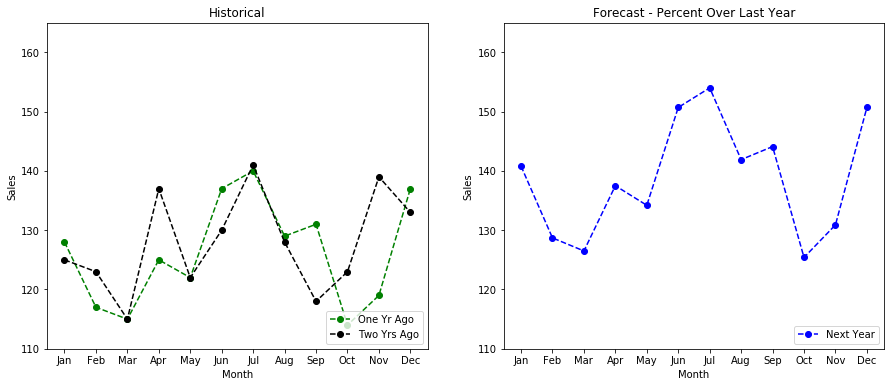

In [64]:
make_plots(percent_over_last_year, 'Percent Over Last Year')

## <a name="calculatedpercentoverlastyear"></a>Method 2: Calculated Percent Over Last Year

Takes a given number of periods to include from the prior years, calculates a year-over-year growth rate from those slices, then forecasts every period for the next year by applying the calculated growth rate.

In [24]:
periods_2 = 4

n_minus_2_sales = sum(two_years_ago[-periods_2:])
n_minus_1_sales = sum(one_year_ago[-periods_2:])
percent_2 = Decimal((n_minus_1_sales / n_minus_2_sales - 1) * 100)

calculated_percent_over_last_year = [Decimal(n) * (1 + percent_2 / 100) for n in one_year_ago]
calculated_percent_over_last_year

[Decimal('125.0058479532163744352146750'),
 Decimal('114.2631578947368422571884139'),
 Decimal('112.3099415204678364066381846'),
 Decimal('122.0760233918128656593893311'),
 Decimal('119.1461988304093568835639871'),
 Decimal('133.7953216374269007626907069'),
 Decimal('136.7251461988304095385160508'),
 Decimal('125.9824561403508773604897897'),
 Decimal('127.9356725146198832110400190'),
 Decimal('111.3333333333333334813630700'),
 Decimal('116.2163742690058481077386432'),
 Decimal('133.7953216374269007626907069')]

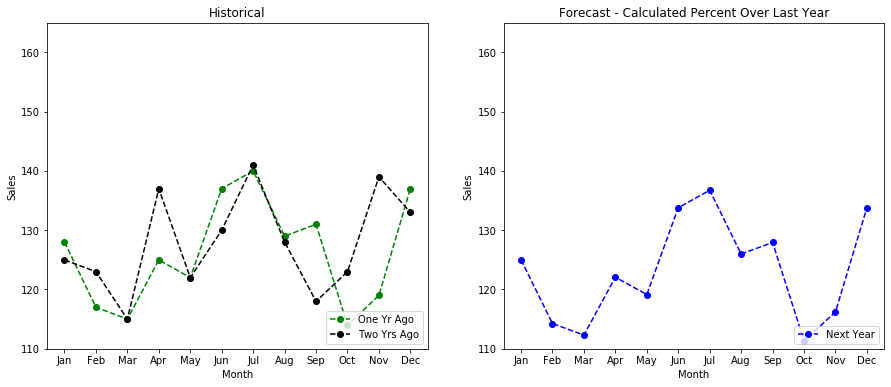

In [65]:
make_plots(calculated_percent_over_last_year, 'Calculated Percent Over Last Year')

## <a name="lastyeartothisyear"></a>Method 3: Last Year to This Year

Uses the same period data from the last year as the forecast for next year. In other words, the forecast applies a 'percent over last year' growth rate of 0%.

In [23]:
last_year_to_this_year = [Decimal(n) for n in one_year_ago]
last_year_to_this_year

[Decimal('128'),
 Decimal('117'),
 Decimal('115'),
 Decimal('125'),
 Decimal('122'),
 Decimal('137'),
 Decimal('140'),
 Decimal('129'),
 Decimal('131'),
 Decimal('114'),
 Decimal('119'),
 Decimal('137')]

In [67]:
# make_plots(last_year_to_this_year, 'Last Year to This Year')

## <a name="movingaverage"></a>Method 4: Moving Average

Averages the prior given number of periods together to determine the next period's value. (Note: example doesn't round the forecasted value each iteration).

In [26]:
periods_4 = 4
moving_average = one_year_ago[-periods_4:]

for i in range(12):
    moving_average.append(Decimal(np.mean(moving_average[-periods_4:])))

del moving_average[:periods_4]
moving_average

[Decimal('125.25'),
 Decimal('123.8125'),
 Decimal('126.265625'),
 Decimal('128.08203125'),
 Decimal('125.8525390625'),
 Decimal('126.003173828125'),
 Decimal('126.55084228515625'),
 Decimal('126.6221466064453125'),
 Decimal('126.257175445556640625'),
 Decimal('126.35833454132080078125'),
 Decimal('126.4471247196197509765625'),
 Decimal('126.421195328235626220703125')]

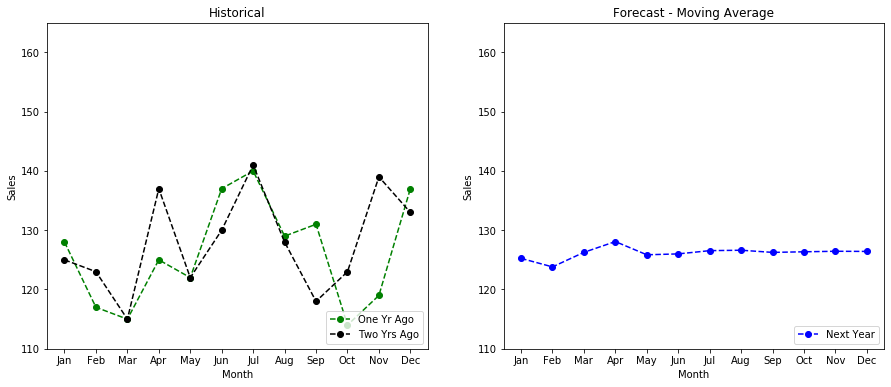

In [68]:
make_plots(moving_average, "Moving Average")

## <a name="linearapproximation"></a>Method 5: Linear Approximation

Calculates a slope (trend) from the endpoints of a given number of periods from historical data, then applies that trend to create the forecast.

In [71]:
periods_5 = 4
slope_5 = Decimal((one_year_ago[-1] - one_year_ago[-(periods_5 + 1)]) / periods_5)

linear_approximation = [Decimal(one_year_ago[-1]) + (slope_5 * (i + 1)) for i in range(len(one_year_ago))]
linear_approximation

[Decimal('139'),
 Decimal('141'),
 Decimal('143'),
 Decimal('145'),
 Decimal('147'),
 Decimal('149'),
 Decimal('151'),
 Decimal('153'),
 Decimal('155'),
 Decimal('157'),
 Decimal('159'),
 Decimal('161')]

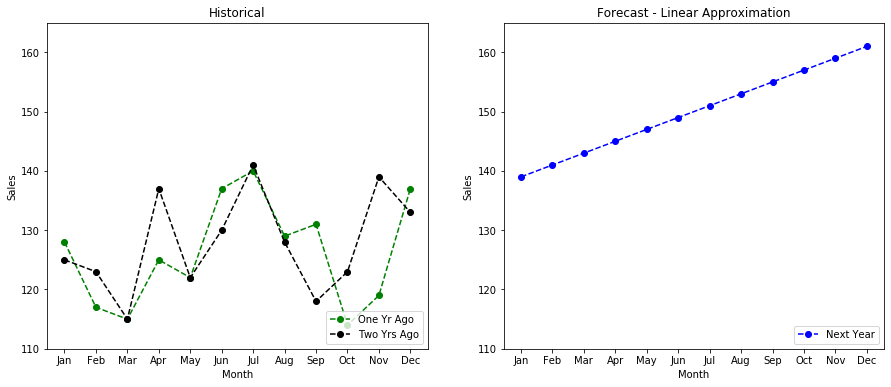

In [69]:
make_plots(linear_approximation, 'Linear Approximation')

## <a name="leastsquaresregression"></a>Method 6: Least Squares Regression

Finds a line of best fit via the Least Squares Method and apply the resulting slope ($m$) and intercept ($b$) to generate the forecasted values with the formula $y = mx + b$.

In [77]:
periods_6 = 4
x_6 = range(1, periods_6 + 1)
y_6 = one_year_ago[-periods_6:]

slope_6, intercept_6, r_value, p_value, std_err = scipy.stats.linregress(x_6, y_6)
print(slope_6, intercept_6)  # 2.3, 119.5

least_squares_regression = [Decimal(i * slope_6 + intercept_6) for i in range(periods_6 + 1, periods_6 + 13)]
least_squares_regression

2.3 119.5


[Decimal('131'),
 Decimal('133.30000000000001136868377216160297393798828125'),
 Decimal('135.599999999999994315658113919198513031005859375'),
 Decimal('137.900000000000005684341886080801486968994140625'),
 Decimal('140.19999999999998863131622783839702606201171875'),
 Decimal('142.5'),
 Decimal('144.80000000000001136868377216160297393798828125'),
 Decimal('147.099999999999994315658113919198513031005859375'),
 Decimal('149.400000000000005684341886080801486968994140625'),
 Decimal('151.69999999999998863131622783839702606201171875'),
 Decimal('154'),
 Decimal('156.30000000000001136868377216160297393798828125')]

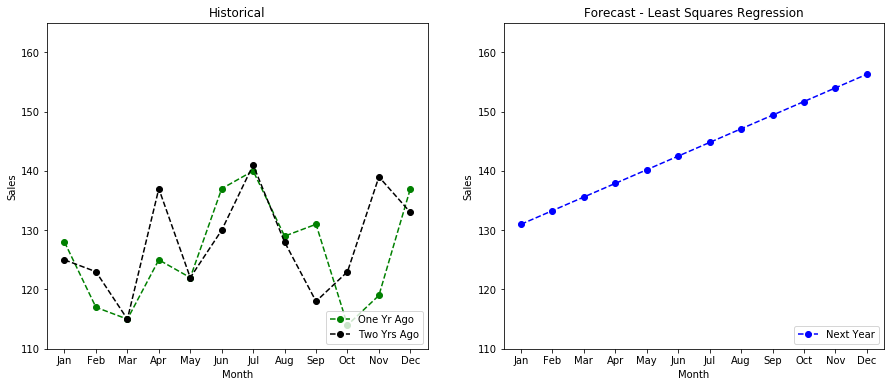

In [78]:
make_plots(least_squares_regression, 'Least Squares Regression')

## <a name="seconddegreeapproximation"></a>Method 7: Second Degree Approximation

Uses a set number of periods historically to fit a second-degree polynomial to the trend, which solves the equation $y = a + bx + cx^2$.

In [88]:
periods_7 = 6
x_7 = range(1, periods_7 + 1)
y_7 = one_year_ago[-periods_7:]

c, b, a = np.polyfit(x_7, y_7, deg=2)

per = range(periods_7 + 1, periods_7 + 13)
second_degree_approximation = [Decimal(a + b*x + c*x**2) for x in per]
second_degree_approximation

[Decimal('148.299999999999954525264911353588104248046875'),
 Decimal('168.957142857142770253631169907748699188232421875'),
 Decimal('195.2214285714284187633893452584743499755859375'),
 Decimal('227.092857142856900054539437405765056610107421875'),
 Decimal('264.5714285714283278139191679656505584716796875'),
 Decimal('307.6571428571425030895625241100788116455078125'),
 Decimal('356.3499999999995679900166578590869903564453125'),
 Decimal('410.649999999999408828443847596645355224609375'),
 Decimal('470.5571428571421392916818149387836456298828125'),
 Decimal('536.071428571427759379730559885501861572265625'),
 Decimal('607.192857142856155405752360820770263671875'),
 Decimal('683.92142857142744105658493936061859130859375')]

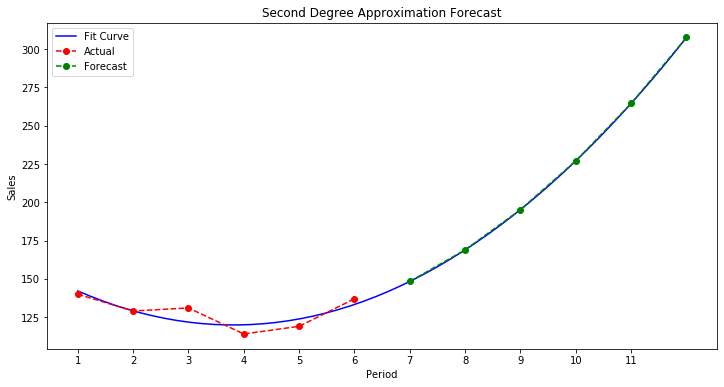

In [94]:
forecast_window = 6

# Create dataset to plot the curve-fit polynomial
tst_x = np.linspace(1, periods_7 + forecast_window, 50)
tst_y = a + b*tst_x + c*tst_x**2

# Plot actual and forecast data vs. polynomial
plt.figure(figsize=(12, 6));
plt.plot(tst_x, tst_y, 'b-', label='Fit Curve');
plt.plot(x_7, y_7, 'ro--', label='Actual');
plt.plot(per[:forecast_window], second_degree_approximation[:forecast_window], 'go--', label='Forecast');
plt.xticks(list(range(1, periods_7 + forecast_window)));
plt.title('Second Degree Approximation Forecast');
plt.xlabel('Period');
plt.ylabel('Sales');
plt.legend();

## <a name="flexiblemethod"></a>Method 8: Flexible Method

Similar to Method 1 (percent over last year), except it applies the growth rate to a given number of periods prior to calculate the first forecast period. For example, when the period is 4, the first forecast number is calculated off the data from September.

In [98]:
percent_8 = Decimal(10)
periods_8 = 4

flexible_method = one_year_ago[-periods_8:]

for i in range(12):
    flexible_method.append(flexible_method[i] * (1 + percent_8 / 100))

del flexible_method[:periods_8]
flexible_method

[Decimal('144.1'),
 Decimal('125.4'),
 Decimal('130.9'),
 Decimal('150.7'),
 Decimal('158.51'),
 Decimal('137.94'),
 Decimal('143.99'),
 Decimal('165.77'),
 Decimal('174.361'),
 Decimal('151.734'),
 Decimal('158.389'),
 Decimal('182.347')]

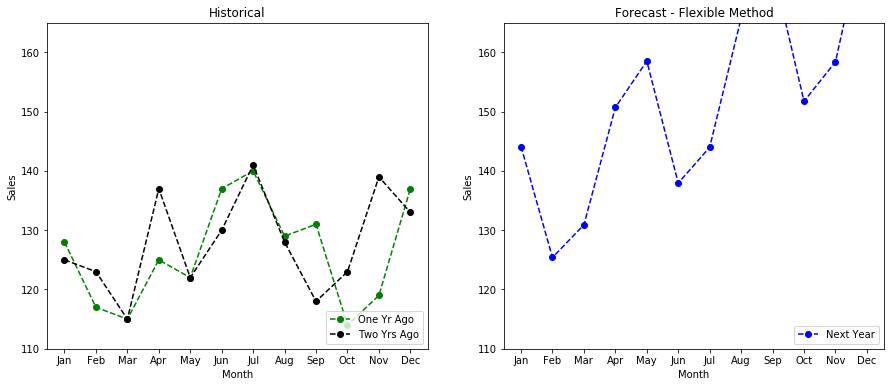

In [99]:
make_plots(flexible_method, 'Flexible Method')

## <a name="weightedmovingaverage"></a>Method 9: Weighted Moving Average

Similar to the moving average method, this calculates a weighted average over the given time period to generate the forecast data. The given weights must sum to 1.

In [111]:
periods_9 = 4
weights_9 = np.array([0.10, 0.15, 0.25, 0.50])
assert sum(weights_9) == 1

weighted_moving_average = one_year_ago[-periods_9:]

for i in range(12):
    weighted_moving_average.append(sum(weights_9 * np.array(weighted_moving_average[i:i + periods_9])))

del weighted_moving_average[:periods_9]
weighted_moving_average = [Decimal(n) for n in weighted_moving_average]
weighted_moving_average

[Decimal('128.44999999999998863131622783839702606201171875'),
 Decimal('127.724999999999994315658113919198513031005859375'),
 Decimal('128.42500000000001136868377216160297393798828125'),
 Decimal('129.111250000000012505552149377763271331787109375'),
 Decimal('128.665625000000005684341886080801486968994140625'),
 Decimal('128.6468750000000227373675443232059478759765625'),
 Decimal('128.69903125000001864464138634502887725830078125'),
 Decimal('128.72220312500002137312549166381359100341796875'),
 Decimal('128.699453125000019326762412674725055694580078125'),
 Decimal('128.6998195312500001818989403545856475830078125'),
 Decimal('128.70300664062500572981662116944789886474609375'),
 Decimal('128.7035964843749979991116560995578765869140625')]

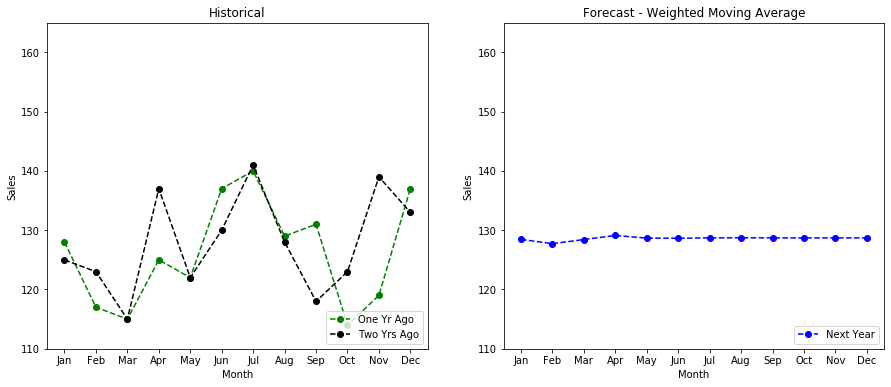

In [112]:
make_plots(weighted_moving_average, 'Weighted Moving Average')

## <a name="linearsmoothing"></a>Method 10: Linear Smoothing

Similar to the weighted moving average method, this method applies a calculated, linearly increasing set of weights applied to historical data to generate the forecast data. The number of periods $n$ determines the total weight $W = \frac{(n^2 + n)}{2}$, then the least recent period of historical data starts with weight $\frac{1}{W}$, linearly increasing through the most recent period with weight $\frac{n}{W}$. For example, when $n=4$, then $W = \frac{(4^2 + 4)}{2} = \frac{20}{2} = 10$ and each prior period's weights are:

| Period    | Weight    |
|-----------|-----------|
| September | 1/10      |
| October   | 2/10      |
| November  | 3/10      |
| December  | 4/10      |
| **Total** | **10/10** |

In [9]:
periods_10 = 4
W = (periods_10**2 + periods_10) / 2

weights_10 = np.array([n / W for n in range(1, periods_10 + 1)])
assert sum(weights_10) == 1

linear_smoothing = one_year_ago[-periods_10:]

for i in range(12):
    linear_smoothing.append(sum(weights_10 * np.array(linear_smoothing[i:i + periods_10])))

del linear_smoothing[:periods_10]
linear_smoothing = [Decimal(n) for n in linear_smoothing]
linear_smoothing

[Decimal('126.400000000000005684341886080801486968994140625'),
 Decimal('126.8600000000000136424205265939235687255859375'),
 Decimal('127.96399999999999863575794734060764312744140625'),
 Decimal('128.223600000000004683897714130580425262451171875'),
 Decimal('127.690640000000001919033820740878582000732421875'),
 Decimal('127.822136000000000422005541622638702392578125'),
 Decimal('127.877166399999993018354871310293674468994140625'),
 Decimal('127.857995359999989659627317450940608978271484375'),
 Decimal('127.8398392639999912034909357316792011260986328125'),
 Decimal('127.8509811935999778143013827502727508544921875'),
 Decimal('127.8516599686399786151014268398284912109375'),
 Decimal('127.8497257343359905235047335736453533172607421875')]

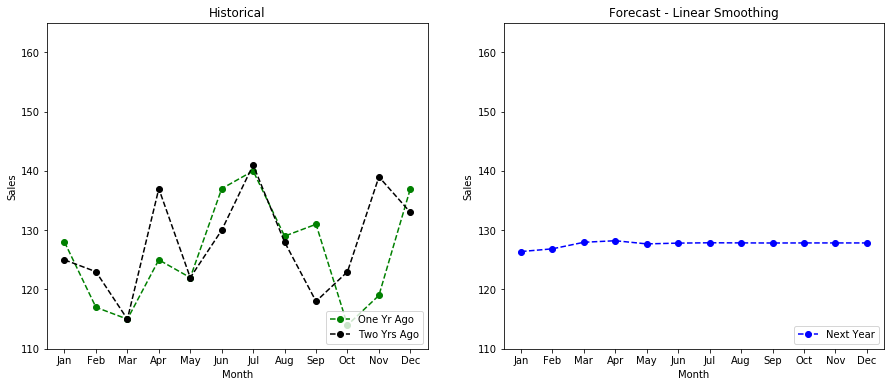

In [10]:
make_plots(linear_smoothing, 'Linear Smoothing')

## <a name="exponentialsmoothing"></a>Method 11: Exponential Smoothing

Exponential smoothing is related to the weighted average and linear smoothing methods. However, instead of using static weights or linearly declining weights for older data, exponential smoothing generates weights that exponentially decay the "less recent" the sales data is to the current forecast period. The exponential decay formula to generate the weights has a 'smoothing' parameter $\alpha$ that falls between 0 and 1. The closer that $\alpha$ is to 1, the more weight applies to older data.

$\text{Forecast}_0 = (\text{Sales}_0)$  
$\text{Forecast}_1 = \alpha (\text{Sales}_1) + (1 - \alpha) (\text{Forecast}_0)$

Once smoothing is applied to the historical data, the forecast is generated by extrapolating the latest value to generate the forecast data.

In [26]:
periods_11 = 4
alpha_11 = 0.3

forecasts = [one_year_ago[-periods_11]]
tmp = one_year_ago[-periods_11 + 1:]

for i, sales in enumerate(tmp):
    forecasts.append(alpha_11 * sales + (1 - alpha_11) * forecasts[i])

exponential_smoothing = [Decimal(forecasts[-1])] * 12
exponential_smoothing

[Decimal('127.780999999999977490006131120026111602783203125'),
 Decimal('127.780999999999977490006131120026111602783203125'),
 Decimal('127.780999999999977490006131120026111602783203125'),
 Decimal('127.780999999999977490006131120026111602783203125'),
 Decimal('127.780999999999977490006131120026111602783203125'),
 Decimal('127.780999999999977490006131120026111602783203125'),
 Decimal('127.780999999999977490006131120026111602783203125'),
 Decimal('127.780999999999977490006131120026111602783203125'),
 Decimal('127.780999999999977490006131120026111602783203125'),
 Decimal('127.780999999999977490006131120026111602783203125'),
 Decimal('127.780999999999977490006131120026111602783203125'),
 Decimal('127.780999999999977490006131120026111602783203125')]

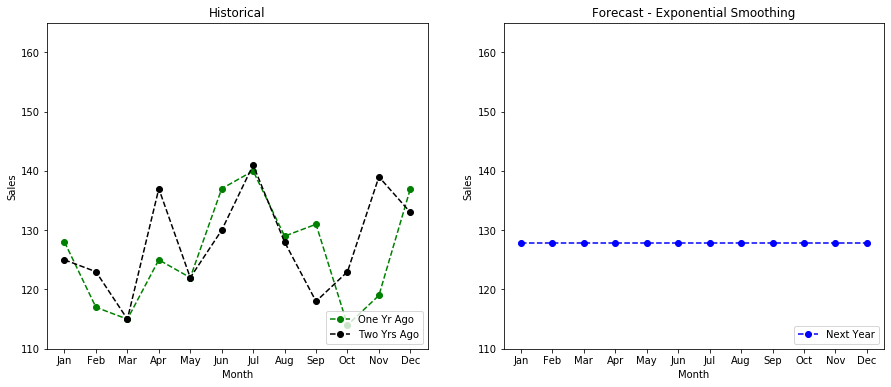

In [27]:
make_plots(exponential_smoothing, 'Exponential Smoothing')